In [39]:
library(tidyverse)
library(data.table)
library(EvolutionaryGames)
library(ggthemes)
library(latex2exp)
library(ggtext)
setwd("D:/social nerwork/1Replicator dynamics for involution in an infinite well-mixed population (2)")

In [10]:
install.packages('truncnorm')#这是一个生成截尾正太分布的包，但相当于是在一个正太分布上直接截取，所得的数据本身不符合正态分布

Installing package into 'C:/Users/女女/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'truncnorm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\女女\AppData\Local\Temp\Rtmp6b19Gx\downloaded_packages


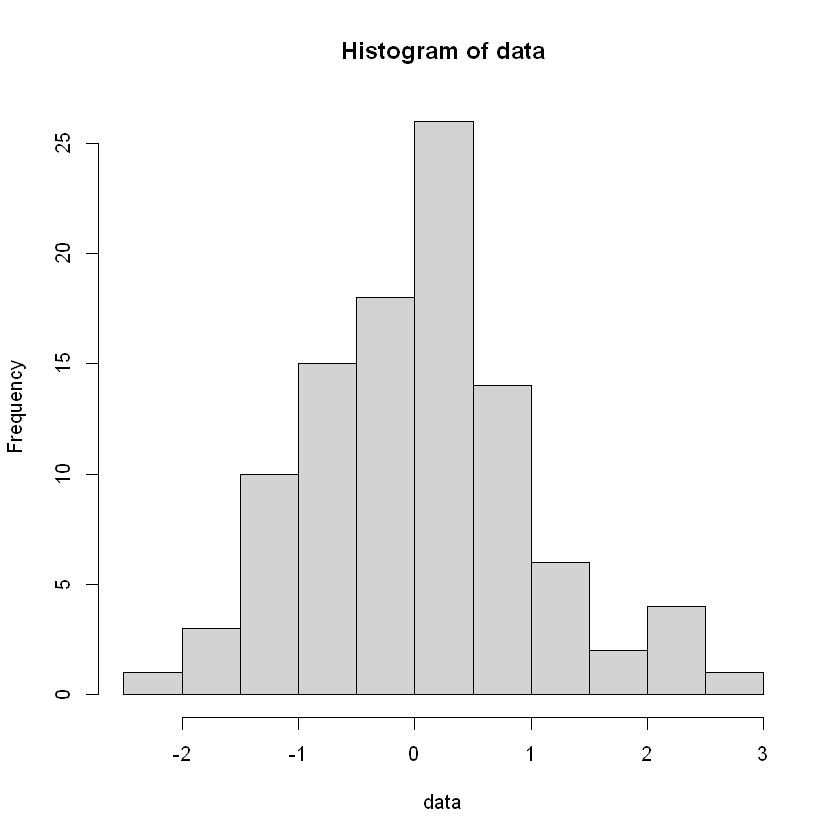

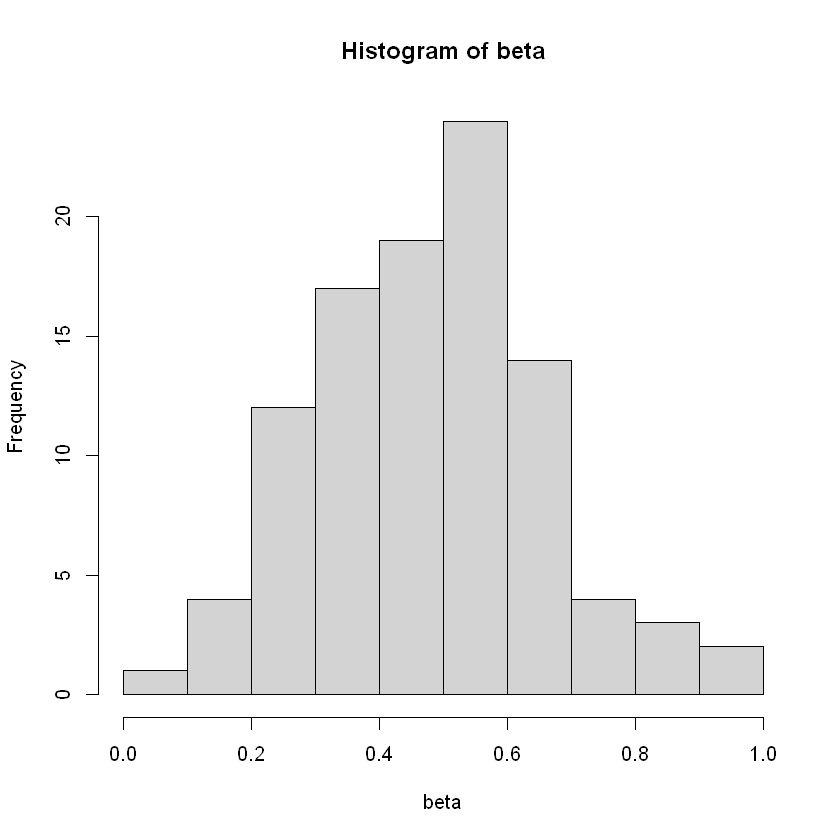

In [40]:
library(truncnorm)
data <- rnorm(n = 100)# 生成100个符合正太分布的数据作为β
hist(data)
beta<-(data-min(data))/(max(data)-min(data)) #0-1标准化
hist(beta)


In [32]:
c<-1
d<-4
utility<-c(c*beta[1:10],d*beta[11:20])
utility
ranking<-rank(utility)
ranking
weight_d=0
pow=1.5
for(i in ranking[1:5]){
    weight_d  <- weight_d + i^pow
}
weight_d

[1] 0.9868895 0.3011813 0.3047871 0.5710294 0.3435707 0.2142237 0.3957599
 [8] 0.4154028 0.4758143 0.8169194 1.7018938 3.6738222 2.9110823 3.5329886
[15] 0.9809249 3.1435695 4.0000000 2.2488243 3.0672118 1.9934061

[1] 11  2  3  8  4  1  5  6  7  9 12 19 15 18 10 17 20 14 16 13

[1] 75.13487

In [75]:
duplicate_dynamic<-function(y,M,beta,d,N,c,pow){
  
  #-----参数解释说明------#
  # #N个个体
  # N<-4
  # #M资源 c(5,15,25)
  # M<-5
  # #less effort的成本
  # c<-1
  # #投入效用
  # beta<-1
  # #more effort的成本
  # d<-4
  #-----------------------#
  
  #群体体选择策略c或d的收益  = 概率*pai
  # 累加
  #等价Pc<(choose(N-1, Nc)*((1-y)^Nc)*(y^Nd))*pai_c
    Pc=0
    Pd=0
#     pow = -1.5
    #第n名获得资源的比重为 k*n^pow
    for (Nd in 0:(N-1)){ 
        Nc<- N-1-Nd
        
        utility<-c(d*beta[1:Nd],c*beta[(Nd+1):N])  # 在这里,效用是按照前Nd个均为内卷，后Nc个均为不内卷排列的
        ranking<-rank(utility)
        
        pai_c = 0
        pai_d = 0
        weight_c = 0
        weight_d = 0            
        #若选择c、d策略，c和d分别的总权重
        for (n in 1:Nd){
            ranking<-ranking[n]
            weight_d  <- weight_d + ranking^pow
        }
        for (n in (Nd+1):N){
            ranking<-ranking[n]
            weight_c <- weight_c + ranking^pow
        }
        weight_all <- weight_c+weight_d-(Nd+1)^pow #求出总权重才能按照占比分配，但是感觉代码很冗余
        # 按照权重占比分配c和d的收益
        pai_d_all = 0
        pai_c_all = 0
        for (n in 1:Nd){
            ranking<-ranking[n]
            pai_dn<-(ranking^pow)/weight_all*M-d
            pai_d_all<-pai_d_all +pai_dn
        }
        for (n in (Nd+1):N){
            ranking<-ranking[n]
            pai_cn<-(ranking^pow)/weight_all*M-c
            pai_c_all<-pai_c_all +pai_cn
        }
  }
    #求平均pai_c,pai_d
    Pc=pai_c_all/Nc
    Pd=pai_d_all/Nd

  #（3）群体选择策略d的平均收益 这里应该也要大改
    R_<-y*Pd+(1-y)*Pc
  
  #(4)复制动态方程
  #y.<-y(Pd-R_) = y(Pd-y*Pd-(1-y)*Pc) = y(1-y)(Pd-Pc)
  y.<-ifelse(is.na(y*((Pd-R_))),0,y*(Pd-R_)) 
}

In [76]:
plot_y._y<-function(M,pow){
  y.<-c()
  
  for(y in seq(0, 1, 0.01)){
    temp<-duplicate_dynamic(y,M,beta=1,d=4,N=5,c=1,pow)
    
    # N: 个体数
    # M: 资源 c(5,15,25)
    # c: less effort的成本
    # beta: 投入效用
    # d: more effort的成本
    
    y.<-c(y.,temp)
  }
  
  df <- data.frame(x = seq(0, 1, 0.01), y = y.) %>% 
    mutate(y1=c(y.[-1],1)) %>% 
    mutate(y0=y*y1)
  
  #ystar<-df$x[df$y0<0]+0.005 #即横坐标
  
  ystar<-ifelse(sum(df$x[df$y0<0])==0,0,df$x[df$y0<0]+0.005)
  
  ggplot(df,aes(x=x,y=y))+
    geom_line(color="black",size=0.3)+
    theme_few() +
    geom_point(aes(x=ystar,y=0))+
    geom_text(aes(x=ystar,y=0),label=paste("y*:",ystar),size=4,nudge_y = 0.001,nudge_x = 0.03,color="red")+
    geom_hline(aes(yintercept = 0),size=0.3)+
    labs(x = "y", y = "y.")
}

In [79]:
M=5
y.<-c()
for(y in seq(0, 1, 0.01)){
    temp<-duplicate_dynamic(y,M,beta=1,d=4,N=5,c=1,pow)
    
    # N: 个体数
    # M: 资源 c(5,15,25)
    # c: less effort的成本
    # beta: 投入效用
    # d: more effort的成本
    
    y.<-c(y.,temp)
  }
  
  df <- data.frame(x = seq(0, 1, 0.01), y = y.) %>% 
    mutate(y1=c(y.[-1],1)) %>% 
    mutate(y0=y*y1)
df

x,y,y1,y0
<dbl>,<dbl>,<dbl>,<dbl>
0.00,0,0,0
0.01,0,0,0
0.02,0,0,0
0.03,0,0,0
0.04,0,0,0
0.05,0,0,0
0.06,0,0,0
0.07,0,0,0
0.08,0,0,0


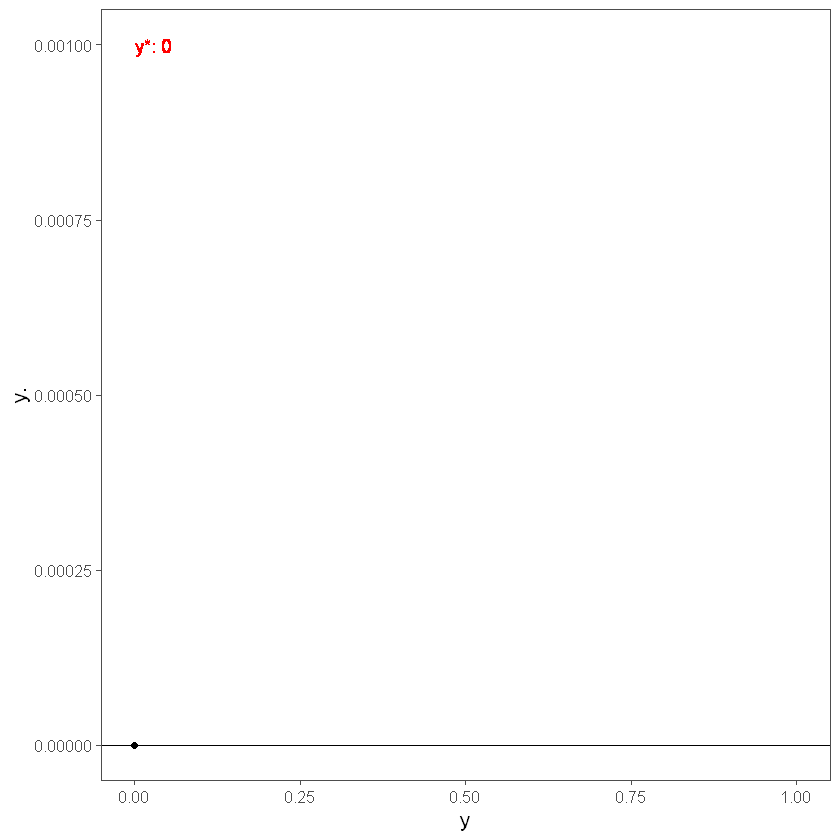

In [78]:
plot_y._y(100,-1.5)